# Initial Exploration and Analysis of 2017&2018 Restaurant Reviews Data in Canada

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

## Analysis 

In [3]:
df = pd.read_csv('2017_restaurant_reviews.csv')

In [4]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
2,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,0,2017-12-12,0,e1HiHHD7CzY5NKZG7hvhTw,5,Absolutely delicious! And great service as wel...,0,Sew1Nht6Q0sGTIZeNvRfLw
3,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,0,2017-08-09,0,oKm8UTv-QSC0oCbniqwxjg,4,"Tasty, authentic Mexican street food that give...",0,NoQCmYKyMPs4D01Wa6dZew
5,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,1,2017-05-10,0,9CLEOpUCqRkIR02sx-JsMQ,5,A little hole in the wall for some really deli...,0,atyCaAjUYatIFDOGKy00SA
6,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,0,2018-01-11,0,hhVr1uH7XaRlbIHI8dYvbA,5,Glad these guys moved in on the block! It's qu...,0,FYhU1fKQ7n11WQ7gcFYOag
7,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,0,2018-04-22,0,BIecLw546kAlD7kmlk7vXA,2,I have been in search of good grilled steak ta...,0,sTVGcezME7gYBhIlYtcfpg


### 1. What are the top 50 restaurants with most reviews in Canada in 2017&2018 ?

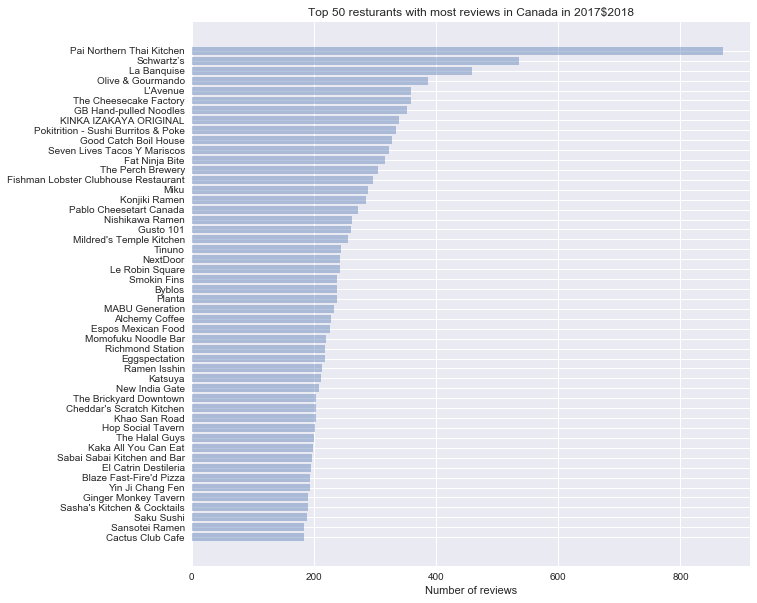

In [5]:
business_id = list(df.groupby(['business_id'])['review_id'].count().index)
resturant_name = [pd.unique(df[df['business_id'] == res]['name'])[0] for res in business_id]
popularity = list(df.groupby(['business_id'])['review_id'].count())
plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:50]] # 存储前50名饭店名，argsort返回从小到大的索引
y_pos = np.arange(len(objects)) # tick的位置
plt.barh(y_pos, np.sort(popularity)[::-1][:50], align='center', alpha = 0.4) # 位置，柱宽度。。。
plt.yticks(y_pos, objects) # 位置loc，标记label
plt.xlabel('Number of reviews')
plt.title('Top 50 resturants with most reviews in Canada in 2017$2018')
plt.gca().invert_yaxis() # gca(**kwargs)获得当前符合参数条件的axes的实例，invert_yaxis反转y轴

### 2. Whether the more reviews means the better quality ?

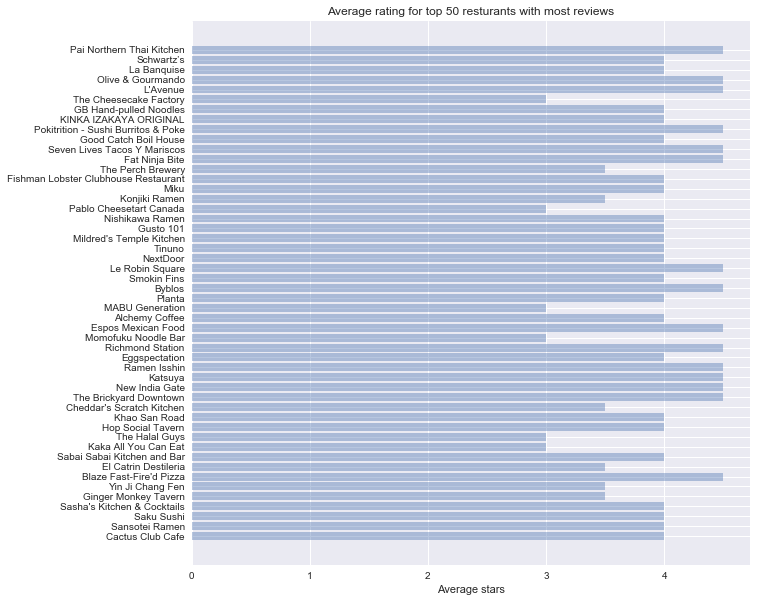

In [6]:
avg_starts = df.groupby(['business_id'])['avg_stars'].mean()
plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:50]]
y_pos = np.arange(len(objects))
plt.barh(y_pos, [avg_starts[i] for i in np.argsort(popularity)[::-1][:50]], align='center', alpha = 0.4)
plt.yticks(y_pos, objects)
plt.xlabel('Average stars')
plt.title('Average rating for top 50 resturants with most reviews')
plt.gca().invert_yaxis()

In [7]:
print('The average rate for all resturants in Canada is %f.' \
     %(np.mean(avg_starts)))
print('The proportion of top 50 resturants with rate less than 4 is %f.' \
     %(sum(np.array([avg_starts[i] for i in np.argsort(popularity)[::-1][:50]]) < 4.0)/50.0))
print('The proportion of top 50 resturants with rate less than 3.5 is %f.' \
     %(sum(np.array([avg_starts[i] for i in np.argsort(popularity)[::-1][:50]]) < 3.5)/50.0))

The average rate for all resturants in Canada is 3.522267.
The proportion of top 50 resturants with rate less than 4 is 0.240000.
The proportion of top 50 resturants with rate less than 3.5 is 0.120000.


**Check how strong the number of reviews and the average rating are related?**

In [8]:
# Pearson product-moment correlation coefficient皮尔逊积矩相关系数,(-1,1),度量变量之间的线性相关程度
from scipy.stats.stats import pearsonr 
print('The correlation coefficient between number of reviews and average rating is %f.' \
      % (pearsonr(np.array(popularity), avg_starts)[0]))

The correlation coefficient between number of reviews and average rating is 0.146933.


**Conclusion: 0.146933 is quite close to 0, which means the relationship between number of reviews and average rating is poor**

**说明“评论数量”与“平均得分”之间的相关性很弱**

### 3. What are the popular restaurant styles in Canada in 2017&2018 ?

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = df['categories']
X = vectorizer.fit_transform(corpus) 
X = np.sum(X, axis=0)
X = np.array(X)[0]
cate_label = vectorizer.get_feature_names()

#### Pick out top 30 labels

In [10]:
top_30_label = [cate_label[i] for i in np.argsort(X)[::-1][1:31]]
top_30_percentage = [X[i]/sum(X) for i in np.argsort(X)[::-1][1:31]]
print('%48s %25s' % ('Label name', 'Percentage of all labels'))
for i in range(30):
    print('%24s %24s %24f' % \
          (str(i+1), top_30_label[i], top_30_percentage[i]))

                                      Label name  Percentage of all labels
                       1                     food                 0.072713
                       2                     bars                 0.062899
                       3                nightlife                 0.031766
                       4                      new                 0.023726
                       5                 american                 0.020966
                       6                breakfast                 0.020718
                       7                   brunch                 0.020712
                       8                 japanese                 0.020192
                       9                  chinese                 0.017839
                      10                 canadian                 0.016919
                      11                    cafes                 0.013755
                      12                      tea                 0.013629
                      13 

**Pick out Labels which can represent food style:**

|index|Food Style|Percentage|
|-----|----------|----------|
|1|american|0.020966|
|2|japanese|0.020192|
|3|chinese|0.017839|
|4|canadian|0.016919|
|5|asian|0.012184|
|6|italian|0.011883|
|7|mexican|0.009089|
|8|korean|0.007771|
|9|french|0.007111|

### 4. Explore styles and stars

In [14]:
top_9_style = ['America','Japanese','Chinese','Canadian','Asian','Italian','Mexican','Korean','French']
style_distribution_ls = []
style_avg_ls = []
for style in top_9_style:
    style_ls = []
    for _,row in df.iterrows():
        if style in row.categories:
            row_dic = {}
            row_dic['categories'] = style
            row_dic['stars'] = row.stars
            style_avg_ls.append(row_dic)
            style_ls.append(row.stars)
    style_distribution_ls.append(style_ls)

#### 4.1 Visualize Distribution

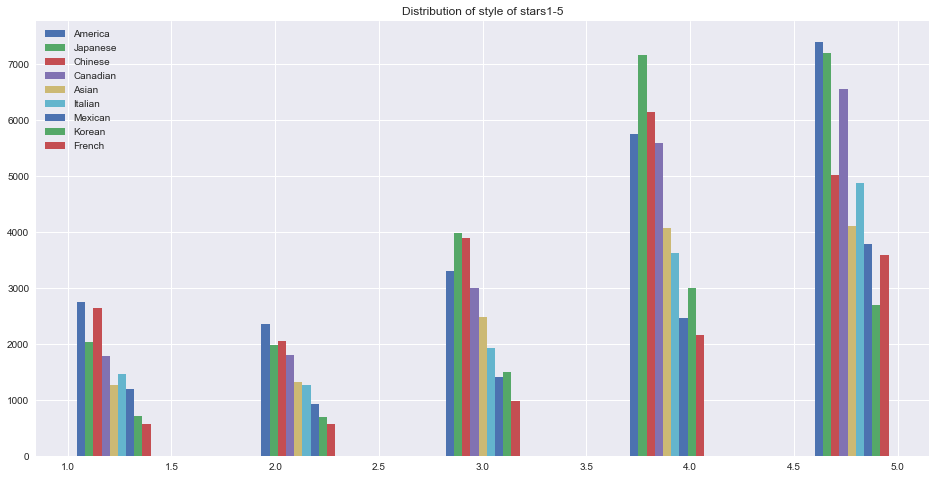

In [15]:
fig,ax=plt.subplots(figsize=(16,8))
ax.hist(style_distribution_ls,len(top_9_style),histtype='bar',label=top_9_style)
ax.set_title('Distribution of style of stars1-5')
ax.legend()
plt.show()

#### 4.2 Compare average stars of every style

In [16]:
df_style_stars = pd.DataFrame(style_avg_ls)
df_style_stars.head(10)

,categories,stars
0,America,5
1,America,1
2,America,4
3,America,3
4,America,3
5,America,3
6,America,2
7,America,1
8,America,5
9,America,1


In [22]:
average_stars_series = df_style_stars.groupby('categories').mean()
print(list(average_stars_series['stars']))

[3.588720515315816, 3.6400513672760235, 3.712418649311853, 3.4485986036628553, 3.96750856707704, 3.695731429439465, 3.6944084387431277, 3.7282229965156795, 3.6864588656106285]


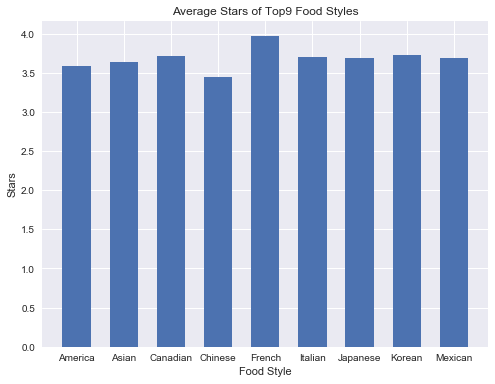

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=[1,2,3,4,5,6,7,8,9],height=list(average_stars_series['stars']),width=0.6,\
       tick_label=average_stars_series.index)
ax.set_title('Average Stars of Top9 Food Styles')
ax.set_xlabel('Food Style')
ax.set_ylabel('Stars')
plt.show()

### 5. Explore cities and stars

In [25]:
df_city_stars = pd.read_csv('2017restaurants_with_all(city).csv')
df_city_stars.head(2)

,business_id,city,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--1UhMGODdWsrMastO9DZw,Calgary,The Spicy Amigos,"Restaurants, Mexican",4.0,1.0,2017-05-10,0.0,9CLEOpUCqRkIR02sx-JsMQ,5.0,littl hole wall realli delici mexican street f...,0.0,atyCaAjUYatIFDOGKy00SA
1,--1UhMGODdWsrMastO9DZw,Calgary,The Spicy Amigos,"Restaurants, Mexican",4.0,2.0,2017-05-01,1.0,ZULaTgcgMFJ4SHo_9ZcgxQ,5.0,fantast spot lunch great valu money attend mee...,2.0,ZS_qdLMh1XyXKGTrpKM-4Q


In [29]:
cities = list(df_city_stars['city'].unique())
print(cities)

['Calgary', 'Toronto', 'Markham', 'Montréal', 'Etobicoke', 'Mississauga', 'Scarborough', 'Chandler', 'Oakville']


In [43]:
cs_distribution_ls = []
city_avgs_ls = []
for city in cities:
    city_ls = []
    for _,row in df_city_stars.iterrows():
        if row.city == city and row.stars != 'nan':
            row_dic = {}
            row_dic['city'] = city
            row_dic['stars'] = row.stars
            city_avgs_ls.append(row_dic)
            city_ls.append(row.stars)
    cs_distribution_ls.append(city_ls)

In [44]:
city_avgs_df = pd.DataFrame(city_avgs_ls)
city_avgs_df.dropna(inplace=True)
city_avgs_df.head(10)

,city,stars
0,Calgary,5.0
1,Calgary,5.0
2,Calgary,4.0
3,Calgary,4.0
5,Calgary,5.0
6,Calgary,5.0
7,Calgary,1.0
8,Calgary,5.0
9,Calgary,3.0
10,Calgary,5.0


#### 5.1 Visualize average stars of every city

In [39]:
city_avgs_df.groupby('city').mean()

,stars
city,
Calgary,3.594104
Chandler,3.505027
Etobicoke,3.293103
Markham,3.351580
Mississauga,3.376532
Montréal,3.901384
Oakville,3.379902
Scarborough,3.336683
Toronto,3.493626


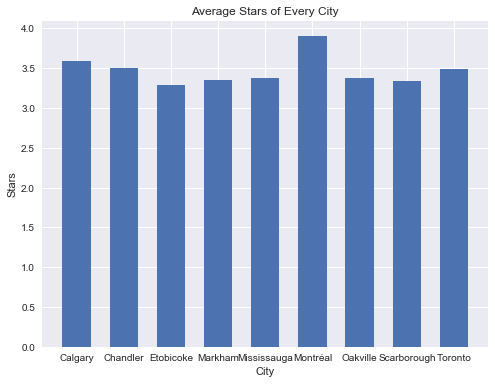

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=[1,2,3,4,5,6,7,8,9],height=list(avgs_city_series['stars']),width=0.6,\
       tick_label=avgs_city_series.index)
ax.set_title('Average Stars of Every City')
ax.set_xlabel('City')
ax.set_ylabel('Stars')
plt.show()